### 1. Dataset import

We will be using the [Maternal Health Risk](https://archive.ics.uci.edu/dataset/863/maternal+health+risk) dataset. Download it and import it into this notebook. Use the first column as index

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

data = pd.read_csv("C:/Users/giannos/Desktop/Maternal-HealthRisk-DataSet.csv")

print(data.head())


   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


### 2.Dataset description & basic EDA

Write a brief description about this dataset. Answer the following questions using the appropriate code and cell texts.

2a. What is the number of samples and features of the data set?

2b. What are the feature names and types.

2c. Are there any missing values? If yes, describe how you handle them

In [2]:
# 2a.

num_samples, num_features = data.drop(['RiskLevel'],axis=1).shape

print("Number of samples:", num_samples)
print("Number of features:", num_features)

Number of samples: 1014
Number of features: 6


In [3]:
# In this dataset we have 6 features that are biological markers and 1 label column with the name RiskLevel
# each feature has 1014 samples

In [4]:
# 2b. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
# The features are named in order Age, Systolic Blood Pressure as SystolicBP, Diastolic BP as DiastolicBP, Blood Sugar as BS, Body Temperature as BodyTemp, HeartRate
# and are monitoring data from patients all the features are numerical values with BS and BodyTemp being floats and all the other features are integers.

In [6]:
# 2c.

print("Null values in each column:")
print(data.isnull().sum())

zero_counts = (data == 0).sum(axis=0)

print("Zero values in each column:")
print(zero_counts)

Null values in each column:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64
Zero values in each column:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [7]:
# From the above code we see that there are no missing values . 
# We have 0 null values for each feature and 0 zero values that are considered as missing values in biological data. 

### 3. Clustering with $k$-means

Cluster the dataset using the $k$-means algorithm excluding the RiskLevel, which is the target variable. Determine the optimal number of clusters using the elbow rule, the silhouette score and the silhouette diagram. Justify your choice.

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt

X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']


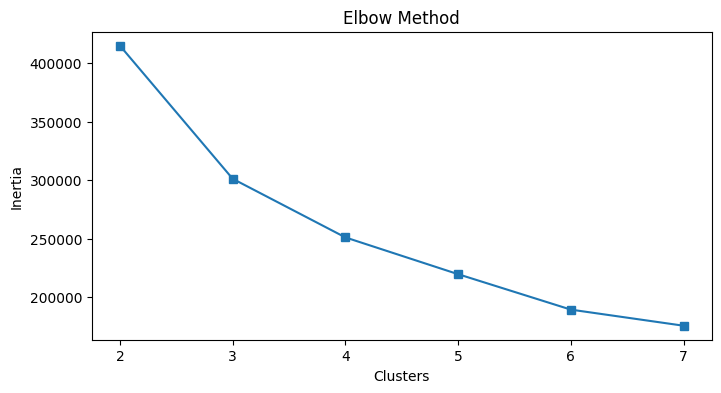

In [9]:
inertia = []
for n_clusters in range(2, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 8), inertia, marker='s', linestyle='-')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [10]:
# After plotting the inertias for each cluster we dont see a clear elbow in the graph to select the optimal k.
# We can see a small angle for k=3 speculating that this is a good choice for the clusters.

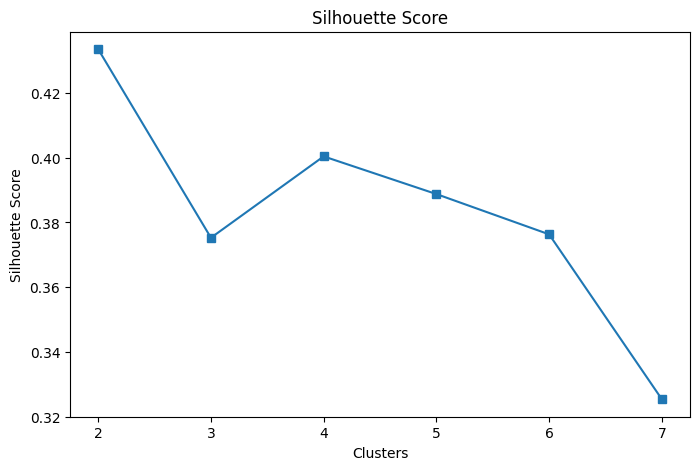

In [11]:
silhouette_scores = []
for n_clusters in range(2, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 8), silhouette_scores, marker='s', linestyle='-')
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [12]:
# From the silhouette score graph we can see that for k=2 we have the highest silhouette score which usually suggests a better cluster structure.
# However, the silhouette score for K=3 and K=4 are also relatively high and close to the score for K=2, indicating they could also be good choices too.

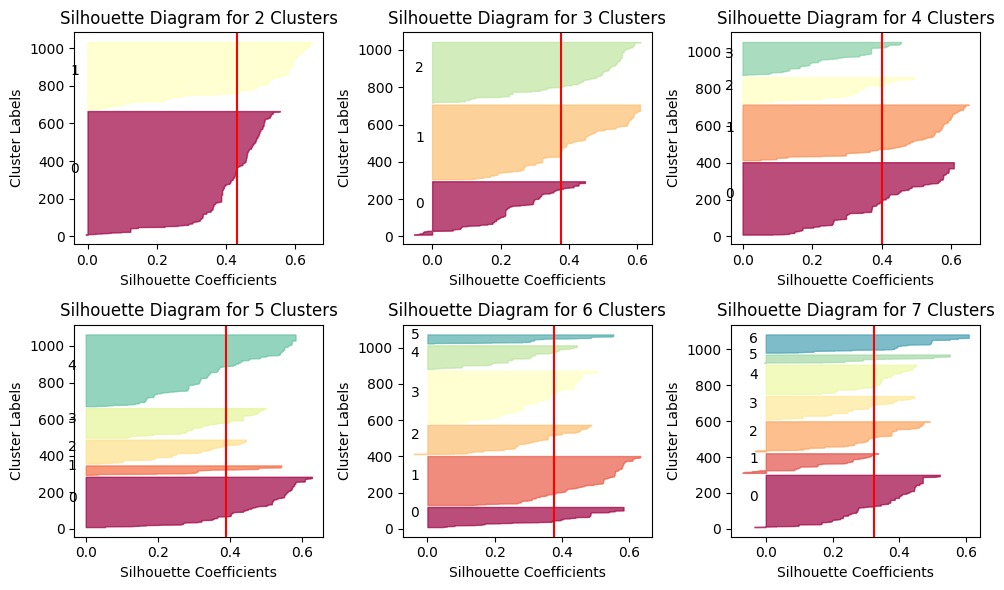

In [13]:
plt.figure(figsize=(10, 6))
for n_clusters in range(2, 8): 
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_vals = silhouette_samples(X, cluster_labels)
    silhouette_avg = silhouette_score(X, cluster_labels)
    y_lower = 10
    plt.subplot(2, 3, n_clusters - 1)
    for i in range(n_clusters):
        ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        ith_cluster_silhouette_vals.sort()
        size_cluster_i = ith_cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.get_cmap("Spectral")(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    plt.title(f'Silhouette Diagram for {n_clusters} Clusters')
    plt.xlabel('Silhouette Coefficients')
    plt.ylabel('Cluster Labels')
    plt.axvline(x=silhouette_avg, color="red", linestyle="-")
    plt.tight_layout()
plt.show()

In [14]:
# After plotting the silhouette diagram we see that for k=2 the silhouette diagram shows a cluster with silhouette coefficients well above average 
# but the other cluster has wider silhouette widths, which suggests more variation within the cluster.
# For the k=3 diagram we see more balance between the clusters 
# but there is a cluster with negative values indicating some points may have been assigned to the wrong cluster.
# The K=4 diagram displays a cluster with lower silhouette values which could mean less cohesion within that cluster.

In [15]:
# After considering the elbow method the silhouette score and silhouette diagram i have the following observations.
# K=2 has the highest average silhouette score that shows a strong structure but the presence of broader silhouettes indicates variance within the clusters.
# K=3 provides a good balance but the presence of negative silhouette values for some data points suggests some misclassification. Also we see the only small angle in the elbow method
# K=4 starts to show diminishing returns with one of the clusters having low average silhouette values.

# For the decision of the k first based on the highest silhouette score k=2 could be the optimal choice. However, the silhouette diagram indicates that one of the clusters 
# may not be as well-defined. K=3 shows a decrease in the silhouette score and the presence of negative silhouette values that shows that some data points are likely misclassified.
# K=4 maintains relatively good silhouette scores and shows a more balanced silhouette diagram ,but the presence of smaller clusters might indicate over-segmentation.

# Afte the whole analysis k=2 seems to be the best choice cause it offers the highest silhouette score, suggesting well-separated clusters on average.
# But the goal is to make sure that all clusters are meaningful and there is an even distribution of data points despite the slightly lower silhouette score, 
# K=3 seems to offer a reasonable compromise between cluster separation and cohesion so i will choose k=3 optimal clusters same as the categories of the data.

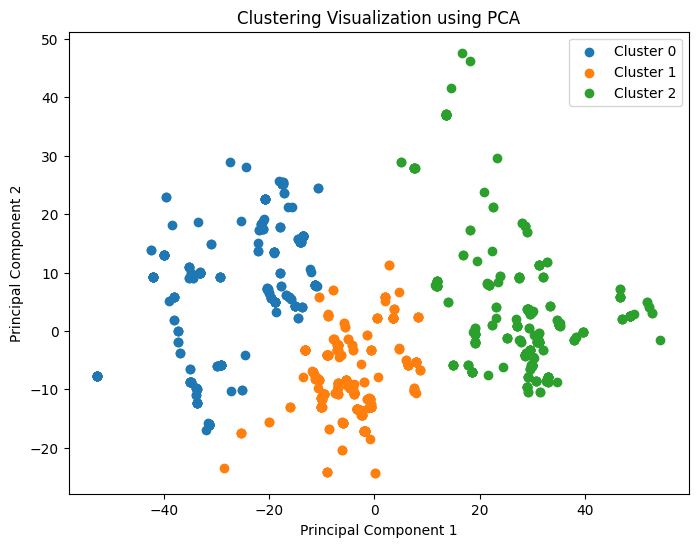

In [16]:
from sklearn.decomposition import PCA

k=3

kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
for cluster in range(k):
    plt.scatter(X_pca[cluster_labels == cluster, 0], X_pca[cluster_labels == cluster, 1], label=f'Cluster {cluster}')

plt.title('Clustering Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [17]:
# From the above code we visualize the whole dataset after reducing it to 2 dimensions using PCA. I experiment with the k value and visualize the clusters
# K=2 has a good division of data but based on the visuals alone, if the clusters are to be evaluated on separation and density, 
# the K=3 clustering appears to offer a reasonable balance, providing distinct groups without excessive fragmentation and data overlaps.

### 4. Analysis

Cluster the dataset with $k$-means, using the optimal $k$ you have determined before, retaining the same attributes as before. For each cluster:

4a. Report the average patient age, the standard deviation and the frequency of systolic and diastolic blood pressure, heart rate and blood glucose levels for each cluster. Do you find any unique or overlapping clusters, based on these two attributes?

4b. Report the frequencies of risk levels for each cluster. Again, do you find unique or overlapping clusters, based on this attribute?

In [18]:
# 4a.

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

cluster_data = data.copy()
cluster_data['Cluster'] = cluster_labels

cluster_statistics = cluster_data.groupby('Cluster').agg({
    'Age': ['mean'],
    'SystolicBP': [ 'std', lambda x: x.value_counts().idxmax()],  
    'DiastolicBP': ['std', lambda x: x.value_counts().idxmax()], 
    'HeartRate': ['std', lambda x: x.value_counts().idxmax()],  
    'BS': ['std', lambda x: x.value_counts().idxmax()] 
})

cluster_statistics.columns = ['Age_Mean', 'SystolicBP_Std', 'SystolicBP_Freq',
                              'DiastolicBP_Std', 'DiastolicBP_Freq',
                              'HeartRate_Std', 'HeartRate_Freq',
                              'BS_Std', 'BS_Freq']

print(cluster_statistics)

          Age_Mean  SystolicBP_Std  SystolicBP_Freq  DiastolicBP_Std  \
Cluster                                                                
0        45.135889       11.030108              120         8.261616   
1        24.241895        6.567437              120         9.298604   
2        23.358896        7.683828               90         6.124310   

         DiastolicBP_Freq  HeartRate_Std  HeartRate_Freq    BS_Std  BS_Freq  
Cluster                                                                      
0                      80       8.616221              70  4.323169     15.0  
1                      80       7.925177              70  1.254023      7.5  
2                      60       7.480565              80  1.610446      7.5  


In [19]:
# Based on the attributes we see that Cluster 0 has higher average age and blood glucose with the most common blood pressure readings being 120/80 mmHg.
# Cluster 1 and Cluster 2 have similar average age, much younger than Cluster 0 and lower stds in blood pressure and blood sugar levels that shows less variability in younger patients.
# Cluster 1 has the same ferquency for systolic and diastolic blood pressure as Cluster 0 but a lower standard deviation for systolic blood pressure.
# Cluster 2 stands out with the lowest average blood pressure readings with modes at 90/60 mmHg and a higher heart rate mode of 80 bpm.

# The data suggest that Cluster 0 might represent an older population with potentially higher variability in health conditions, thats because of the higher standard deviations 
# in blood pressure and blood sugar. But  Clusters 1 and 2 are quite similar in terms of age but differ in their blood pressure and heart rate characteristics, 
# with Cluster 2 showing a tendency towards lower blood pressure and slightly higher heart rates.
# There is some overlap between the clusters on the frequency of blood pressure and heart rate, but the average ages and the standard deviations of these measures
# help to differentiate between the clusters.


In [20]:
# 4b.

risk_level_frequencies = cluster_data.groupby('Cluster')['RiskLevel'].value_counts()
print(risk_level_frequencies)

Cluster  RiskLevel
0        high risk    180
         mid risk      55
         low risk      52
1        mid risk     188
         low risk     174
         high risk     39
2        low risk     180
         mid risk      93
         high risk     53
Name: RiskLevel, dtype: int64


In [21]:
# Each cluster has a dominant risk level: Cluster 0 has high risk, Cluster 1 has mid risk, and Cluster 2 has low risk
# There is a clear distinction between the clusters so the k=3 is a good choise for optimal k 
# Cluster 0 being the most at-risk group, Cluster 2 being the least at-risk, and Cluster 1 falling in between.

# All clusters contain patients from each risk category, indicating some overlap. However, the distribution within each cluster differs.
# Clusters 1 and 2 have a higher frequency of low-risk patients compared to Cluster 0, which might suggest they are generally healthier populations.
# High-risk patients are present in all clusters but are the most frequent in Cluster 0, indicating that while this risk level is present across the clusters, 
# It is more concentrated in Cluster 0.

 Based on the clustering analysis above, are there any correlations between  age, blood pressure & glucose levels in the dataset?

In [22]:
# The clustering analysis above does not include direct correlation values, but it does give us information on potential relationships between the attributes.

# On Cluster 0 we have the highest average Age and and the highest frequency ofRisk level that suggests a possible correlation between older age and higher health risk.

# On Cluster 2 Blood Pressure and Age have a lower frequency and mostly consists of low risk patients who are also younger on average. 
# This could imply that younger patients tend to have lower blood pressure and lower risk.

# On Cluster 2 Blood Glucosel levels have a higher frequency and an older average Age, which may suggest that higher blood glucose levels are associated with older age.

# On cluster 0 Blood Glucose levels and Risk have both the highest frequency  indicating a potential link between higher blood glucose levels and increased health risk.

# On Cluster 2 Blood Pressure shows a lower mode and low Risk level. 
# In contrast, Cluster 0, with the highest frequency of high risk patients, does not show a frequency for higher blood pressure but does have higher standard deviations
# That indicates more variability and potentially higher blood pressure readings among some patients.

### 5. Hierarchical Agglomerative Clustering

For the distinct number of risk levels in the dataset, perform HAC using the Ward's method.

In [23]:
from sklearn.cluster import AgglomerativeClustering

# distinct number of risk levels
distinct_risk_levels = y.nunique()

hac = AgglomerativeClustering(n_clusters=distinct_risk_levels, linkage='ward')
cluster_labels = hac.fit_predict(X)

cluster_data = data.copy()  
cluster_data['Cluster'] = cluster_labels  

print(cluster_data['Cluster'].value_counts())

2    416
0    323
1    275
Name: Cluster, dtype: int64


Plot cluster membership with respect to systolic and diastolic blood pressure. Overlay in the plot the risk level of each sample.

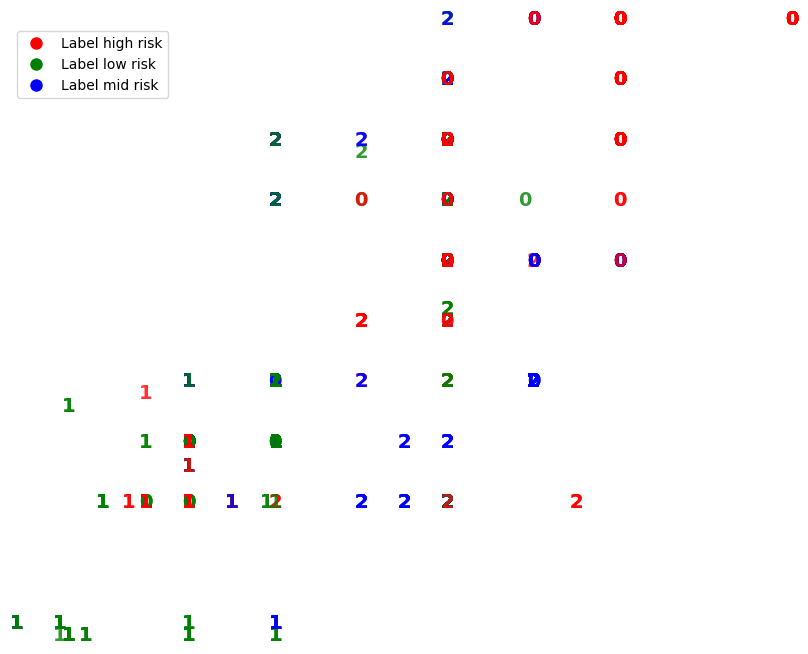

In [27]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

X_plot = MinMaxScaler().fit_transform(X)
y_encoded = LabelEncoder().fit_transform(y)

plt.figure(figsize=(10, 8))
colors = 'rgb'

for i in range(X.shape[0]):
    plt.text(
        X_plot[i, 1], X_plot[i, 2], str(cluster_labels[i]),
        color=colors[y_encoded[i]],
        fontdict={'weight': 'bold', 'size': 14, 'alpha': 0.8}
    )

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'Label {label}', markerfacecolor=colors[i], markersize=10)
                   for i, label in enumerate(np.unique(y))]

plt.legend(handles=legend_elements, loc='upper left')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Comment on the obtained plot, especially with respect to possible overlaps between clusters and risk levels.

In [25]:
# On the above plot on cluster membership with respect to systolic and diastolic pressure the clusters represented by numbers (0, 1, 2) appear to be spread across 
# different risk levels (high, mid, low). There seems to be a mix of risk levels within each cluster. There is also an overlap of risk levels within the clusters. 
# Cluster 2 contains all three risk levels, which suggests that blood pressure alone may not be a definitive indicator of risk level.
# High-risk labels appear in multiple clusters, indicating that high-risk patients have different blood pressure profile. 
# This shows that other factors aside from blood pressure contribute to the high-risk categorization.
# Low and Mid-risk patients also appear in more than one cluster, which shows the overlapping characteristics between the clusters.
# The distribution of risk labels within these clusters indicate that while blood pressure is a factor in risk assessment, it is not the only determinant of risk level.
# The overlap in risk levels across clusters shows the difficulty in categorizing health risk and the need for better modeling that includes various biological markers,
# not just blood pressure readings.
